# ODE model

In [338]:
include("ThresholdModels.jl")
using NLsolve
gamma0_=0.15
MSY_=10.0
FMSY_=0.2
sol1 = nlsolve(x->ThresholdModels.target1(x,gamma0_,MSY_,FMSY_),[0.0001,0.0000001,100])
ThresholdModels.Bt([log(10),0.0],0.001,vcat(sol1.zero,[0.02]))
ThresholdModels.Bmsy2(sol1.zero;Bmax = 500)
pars=ThresholdModels.reparam2(gamma0_,MSY_,FMSY_)

3-element Vector{Float64}:
   7.076205270046538e-5
 -24.18651620705165
  87.64305726901797

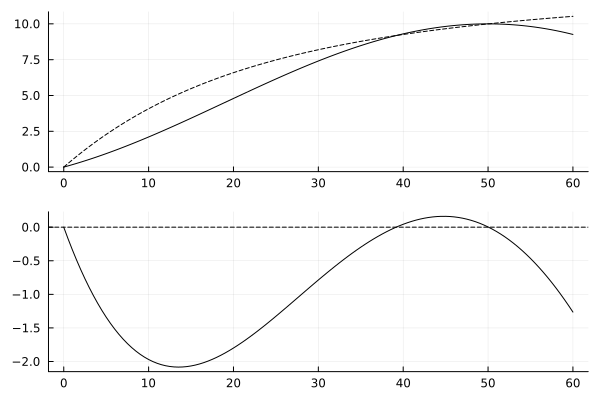

In [339]:

pars=ThresholdModels.reparam2(gamma0_,MSY_,FMSY_)
b = 0.045 #0.045,0.0,0.0125,0.035,0.0
theta=vcat(pars,[b,sigma2nu,sigma2E,sigma2c])
Bt = 0.0:0.5:60
E = 0.65 #0.65,0.2,0.0325,0.55,0.2
Surplus = broadcast(x->ThresholdModels.Ht([x,0.0],10^-10,theta)[1],log.(Bt)) .- Bt
Catch = broadcast(x->ThresholdModels.Ht([x,0.0],E,theta)[2],log.(Bt))
p1=Plots.plot(Bt,Surplus, color = "black")
Plots.plot!(Bt,Catch, color = "black",linestyle=:dash, legend = false)
p2=Plots.plot(Bt,Surplus.-Catch, color = "black", legend = false)
Plots.hline!([0.0], color = "black",linestyle=:dash, legend = false)
plot(p1,p2,layout=(2,1))

In [322]:
include("../src/MDPsolver.jl")
include("ThresholdModels.jl")
Bmax = 100; Bmin = 0.5; CVmax = 1.0; N = 30
V = MDPsolver.ValueFunctions.init_Norm2DGrid(log(Bmax),log(Bmin),log(CVmax^2+1),N)
print(" ")

In [323]:
include("ThresholdModels.jl")
pars = ThresholdModels.reparam2(gamma0_,MSY_,FMSY_)
b = 0.0125
sigma2nu = 0.05
sigma2E = 0.05
sigma2c = 0.1
theta=vcat(pars,[b,sigma2nu,sigma2E,sigma2c])
price=1.0
beta = 0.75
c1 =0.00
c2 = 0.1
b1=0.0
nmv=0.0
R = (x,a) -> ThresholdModels.R(x,theta,a,price,beta,c1,c2,b1,nmv) 
effort = 2*collect(0.000001:0.05:1.000001)
sigma2B = [10,0.1] 
actions1 =reshape(collect(Base.Iterators.product(effort,sigma2B)),length(sigma2B)*length(effort))
grid1 = ThresholdModels.init_transitions(theta,V,actions1;mQuad=10)
print(" ")

In [324]:
ThresholdModels.computeTransitions!(grid1)

┌ Info:  started timer at: 2022-12-07T21:31:57.708
└ @ TickTock /Users/johnbuckner/.julia/packages/TickTock/fGILW/src/TickTock.jl:54


progress = 5.0%  time: 33.1
progress = 10.0%  time: 62.0
progress = 15.0%  time: 91.9
progress = 20.0%  time: 122.8
progress = 25.0%  time: 156.1
progress = 30.0%  time: 193.2
progress = 35.0%  time: 230.8
progress = 40.0%  time: 269.1
progress = 45.0%  time: 307.4
progress = 50.0%  time: 345.4
progress = 55.0%  time: 382.8
progress = 60.0%  time: 420.4
progress = 65.0%  time: 459.3
progress = 70.0%  time: 498.1
progress = 75.0%  time: 536.3
progress = 80.0%  time: 574.6
progress = 85.0%  time: 614.0
progress = 90.0%  time: 653.5
progress = 95.0%  time: 693.4
progress = 100.0%  time: 732.3


In [325]:
include("../src/MvGaussHermite.jl")
quadR = MvGaussHermite.init_mutable(6,[0.0], [theta[4];;])
R = (x,a) -> sum(broadcast(nu -> ThresholdModels.R([x[1],nu],theta,a,price,beta,c1,c2,b,nmv),quadR.nodes).*quadR.weights) 
rewards = ThresholdModels.init_rewards(R,V,actions1;mQuad=6)
print(" ")

In [326]:
ThresholdModels.computeRewards!(rewards)
MDPsolver.solve_parallel(grid1,V,rewards,1/(1.05))

┌ Info:  started timer at: 2022-12-07T21:46:39.799
└ @ TickTock /Users/johnbuckner/.julia/packages/TickTock/fGILW/src/TickTock.jl:54


progress = 5.0%  time: 4.1
progress = 10.0%  time: 5.4
progress = 15.0%  time: 6.2
progress = 20.0%  time: 7.1
progress = 25.0%  time: 8.4
progress = 30.0%  time: 9.4
progress = 35.0%  time: 10.7
progress = 40.0%  time: 12.1
progress = 45.0%  time: 13.1
progress = 50.0%  time: 14.5
progress = 55.0%  time: 15.9
progress = 60.0%  time: 17.3
progress = 65.0%  time: 18.3
progress = 70.0%  time: 19.7
progress = 75.0%  time: 21.2
progress = 80.0%  time: 22.2
progress = 85.0%  time: 23.6
progress = 90.0%  time: 25.0
progress = 95.0%  time: 26.5
progress = 100.0%  time: 27.5
interation: 1  convergence: 9000
interation: 2  convergence: 564571.6297686117
interation: 3  convergence: 74269.21153909163
interation: 4  convergence: 7951.739757271826
interation: 5  convergence: 4286.023903812825
interation: 6  convergence: 4462.384828933071
interation: 7  convergence: 4580.70605872984
interation: 8  convergence: 4569.674268017124
interation: 9  convergence: 4527.516023211883
interation: 10  convergenc

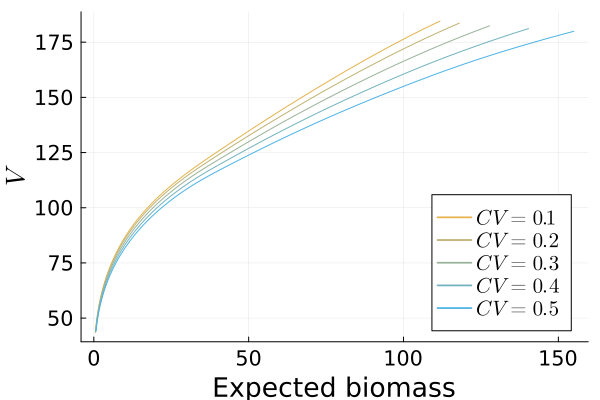

In [327]:
using LaTeXStrings
using Colors
using Plots
sigma = [log(0.2^2+1), log(0.4^2+1),log(0.6^2+1),log(0.8^2+1), log(1.0^2+1)]
meanNodes = log(0.5):0.005:log(110)
p1 = Plots.plot(exp.(meanNodes.+0.5*sigma[1]),broadcast(x->V([x,sigma[1]]), meanNodes), label = L"CV = 0.1",
            c = Colors.RGB(0.9,0.7,0.3))
Plots.plot!(exp.(meanNodes.+0.5*sigma[2]),broadcast(x->V([x,sigma[2]]), meanNodes), label = L"CV = 0.2",
            c = Colors.RGB(0.75,0.7,0.45))
Plots.plot!(exp.(meanNodes.+0.5*sigma[3]),broadcast(x->V([x,sigma[3]]), meanNodes), label = L"CV = 0.3",
            c = Colors.RGB(0.6,0.7,0.6))
Plots.plot!(exp.(meanNodes.+0.5*sigma[4]),broadcast(x->V([x,sigma[4]]), meanNodes), label = L"CV = 0.4",
            c = Colors.RGB(0.45,0.7,0.75))
Plots.plot!(exp.(meanNodes.+0.5*sigma[5]),broadcast(x->V([x,sigma[5]]), meanNodes), label = L"CV = 0.5",
            c = Colors.RGB(0.3,0.7,0.9),xlab = "Expected biomass", ylab = L"V", 
            legend = :bottomright,tickfontsize = 14,guidefontsize=18,legendfontsize=14)

In [328]:
# policy function 
P = MDPsolver.ValueFunctions.init_Norm2DGrid_policy(log(Bmax),log(Bmin),log(CVmax^2+1),N)
MDPsolver.policy_parallel!(P,grid1,V,rewards,1/(1.05))
print(" ")

here 

In [329]:
Bhat_sigma1 = exp.(V.nodesMean.+0.5*sigma[1])
Bhat_sigma2 = exp.(V.nodesMean.+0.5*sigma[2])
Bhat_sigma3 = exp.(V.nodesMean.+0.5*sigma[3])
Bhat_sigma4 = exp.(V.nodesMean.+0.5*sigma[4])
Bhat_sigma5 = exp.(V.nodesMean.+0.5*sigma[5])

E_sigma1 = broadcast(x -> P([x,sigma[1]])[1], V.nodesMean)
E_sigma2 = broadcast(x -> P([x,sigma[2]])[1], V.nodesMean)
E_sigma3 = broadcast(x -> P([x,sigma[3]])[1], V.nodesMean)
E_sigma4 = broadcast(x -> P([x,sigma[4]])[1], V.nodesMean)
E_sigma5 = broadcast(x -> P([x,sigma[5]])[1], V.nodesMean)

M_sigma1 = broadcast(x -> P([x,sigma[1]])[2], V.nodesMean)
M_sigma2 = broadcast(x -> P([x,sigma[2]])[2], V.nodesMean)
M_sigma3 = broadcast(x -> P([x,sigma[3]])[2], V.nodesMean)
M_sigma4 = broadcast(x -> P([x,sigma[4]])[2], V.nodesMean)
M_sigma5 = broadcast(x -> P([x,sigma[5]])[2], V.nodesMean)

function Median_Harvest(s)
    E = P(s)[1]
    Bt,Ct=ThresholdModels.Ht([s[1],0.0],E,theta)
    return Ct
end 

function Median_Escapement(s)
    E = P(s)[1]
    Bt,Ct=ThresholdModels.Ht([s[1],0.0],E,theta)
    return Bt
end 

H_sigma1= broadcast(x -> Median_Harvest([x,sigma[1]])[1], V.nodesMean)
H_sigma2= broadcast(x -> Median_Harvest([x,sigma[2]])[1], V.nodesMean)
H_sigma3= broadcast(x -> Median_Harvest([x,sigma[3]])[1], V.nodesMean)
H_sigma4= broadcast(x -> Median_Harvest([x,sigma[4]])[1], V.nodesMean)
H_sigma5= broadcast(x -> Median_Harvest([x,sigma[5]])[1], V.nodesMean)

Esc_sigma1= broadcast(x -> Median_Escapement([x,sigma[1]])[1], V.nodesMean)
Esc_sigma2= broadcast(x -> Median_Escapement([x,sigma[2]])[1], V.nodesMean)
Esc_sigma3= broadcast(x -> Median_Escapement([x,sigma[3]])[1], V.nodesMean)
Esc_sigma4= broadcast(x -> Median_Escapement([x,sigma[4]])[1], V.nodesMean)
Esc_sigma5= broadcast(x -> Median_Escapement([x,sigma[5]])[1], V.nodesMean)
print(" ")


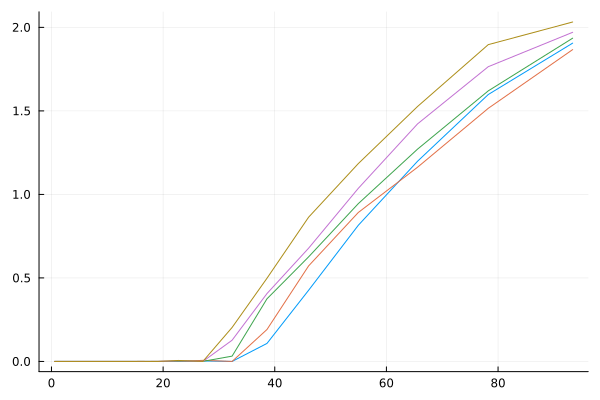

In [344]:
Plots.plot(Bhat_sigma1,E_sigma1)
Plots.plot!(Bhat_sigma1,E_sigma2)
Plots.plot!(Bhat_sigma1,E_sigma3)
Plots.plot!(Bhat_sigma1,E_sigma4,legend = false)
Plots.plot!(Bhat_sigma1,E_sigma5,legend = false)

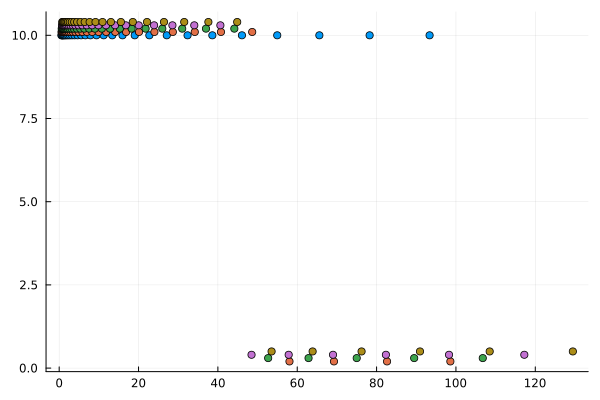

In [331]:
Plots.scatter(Bhat_sigma1,M_sigma1)
Plots.scatter!(Bhat_sigma2,M_sigma2.+0.1)
Plots.scatter!(Bhat_sigma3,M_sigma3.+0.2)
Plots.scatter!(Bhat_sigma4,M_sigma4.+0.3,legend = false)
Plots.scatter!(Bhat_sigma5,M_sigma5.+0.4,legend = false)

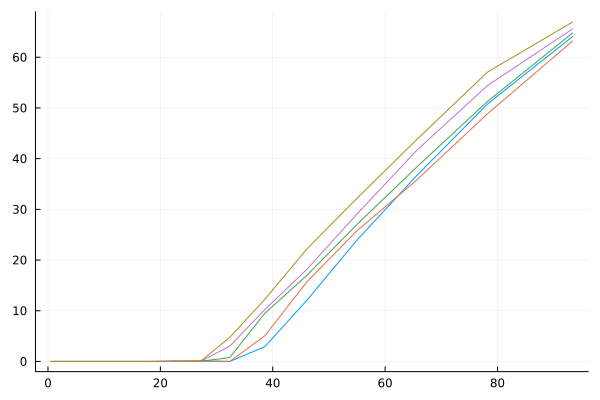

In [332]:
Plots.plot(Bhat_sigma1,H_sigma1)
Plots.plot!(Bhat_sigma1,H_sigma2)
Plots.plot!(Bhat_sigma1,H_sigma3)
Plots.plot!(Bhat_sigma1,H_sigma4)
Plots.plot!(Bhat_sigma1,H_sigma5,legend = false)

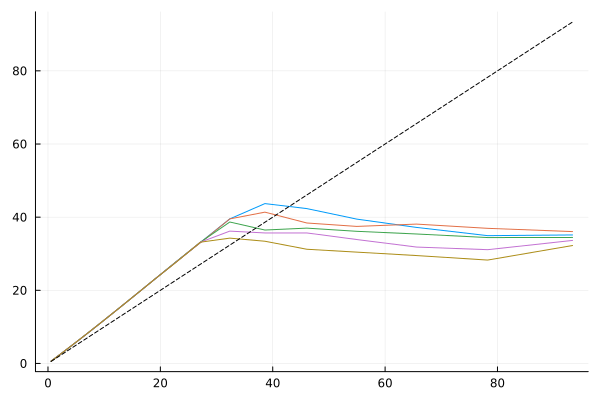

In [342]:
Plots.plot(Bhat_sigma1,Esc_sigma1)
Plots.plot!(Bhat_sigma1,Esc_sigma2)
Plots.plot!(Bhat_sigma1,Esc_sigma3)
Plots.plot!(Bhat_sigma1,Esc_sigma4)
Plots.plot!(Bhat_sigma1,Esc_sigma5,legend = false)
Plots.plot!(Bhat_sigma1,Bhat_sigma1,color = "black",linestyle=:dash)

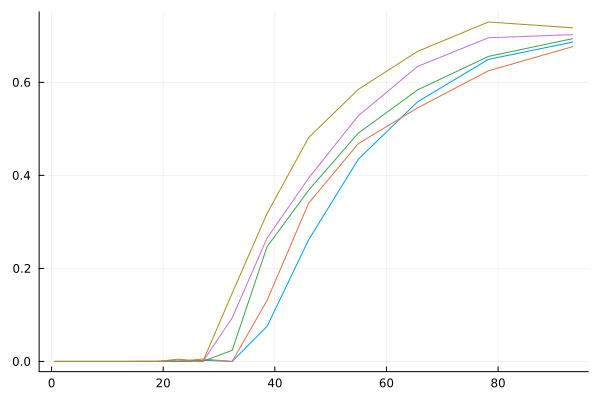

In [341]:
Plots.plot(Bhat_sigma1,H_sigma1./Bhat_sigma1)
Plots.plot!(Bhat_sigma1,H_sigma2./Bhat_sigma1)
Plots.plot!(Bhat_sigma1,H_sigma3./Bhat_sigma1)
Plots.plot!(Bhat_sigma1,H_sigma4./Bhat_sigma1,legend = false)
Plots.plot!(Bhat_sigma1,H_sigma5./Bhat_sigma1,legend = false)

In [335]:
include("ThresholdModels.jl")
B0 = 50
tau2B = 0.1
function simulate(Bt,Bhat,tau2B)
    E0,sigma2B = P([log(Bt),tau2B])
    r = R([log(Bt)],(E0,sigma2B))
    mean,Cov=ThresholdModels.time_update(log(B0),tau2B,E0,theta)
    Bt,Ct=ThresholdModels.T(log(Bt),E0,theta)
    Bhat,tau2B=ThresholdModels.measurement_update(Bt,log(Ct),mean,Cov,sigma2B,theta)
    return exp.(Bt),exp.(Bhat),tau2B,Ct,r
end 

function time_series(T,B0,Bhat0,tau2B0)
    Btls=zeros(T)
    Bhatls=zeros(T)
    tau2Bls=zeros(T)
    Ctls=zeros(T)
    rls=zeros(T)
    Bt,Bhat,tau2B = (B0,Bhat0,tau2B0)
    for t in 1:T
        Bt,Bhat,tau2B,Ct,r = simulate(Bt,Bhat,tau2B)
        Btls[t]=Bt;Bhatls[t]=Bhat;tau2Bls[t]=tau2B
        Ctls[t]=Ct;rls[t]=r
    end 
    return Btls,Bhatls,tau2Bls,Ctls,rls
end 

time_series (generic function with 1 method)

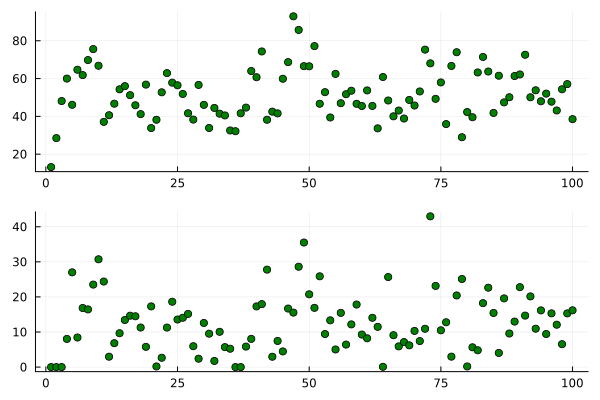

In [345]:
Bt = 10
Bhat = 50
tau2B = 0.1
T = 100
Btls,Bhatls,tau2Bls,Ctls,rls=time_series(T,Bt,Bhat,tau2B)
p1 = Plots.scatter(Btls, color="green",label = "")
p2 = Plots.scatter(Ctls, color="green",label = "")
plot(p1,p2,layout=(2,1))

# Parameter sets

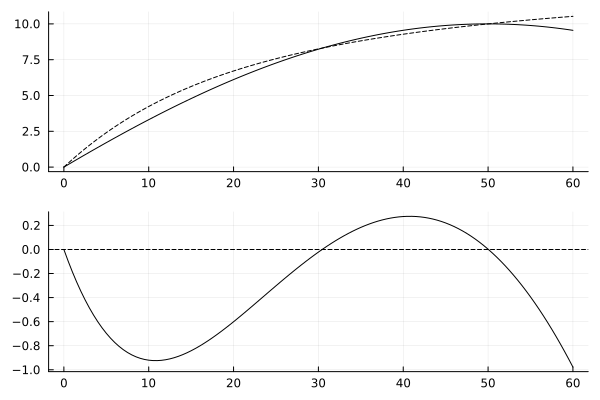

In [337]:
gamma0_=0.3 #0.3,-0.1,0.15,0.3,0.0
MSY_=10.0
FMSY_=0.2
pars=ThresholdModels.reparam2(gamma0_,MSY_,FMSY_)
b = 0.045 #0.045,0.0,0.0125,0.035,0.0
theta=vcat(pars,[b,sigma2nu,sigma2E,sigma2c])
Bt = 0.0:0.5:60
E = 0.65 #0.65,0.2,0.0325,0.55,0.2
Surplus = broadcast(x->ThresholdModels.Ht([x,0.0],10^-10,theta)[1],log.(Bt)) .- Bt
Catch = broadcast(x->ThresholdModels.Ht([x,0.0],E,theta)[2],log.(Bt))
p1=Plots.plot(Bt,Surplus, color = "black")
Plots.plot!(Bt,Catch, color = "black",linestyle=:dash, legend = false)
p2=Plots.plot(Bt,Surplus.-Catch, color = "black", legend = false)
Plots.hline!([0.0], color = "black",linestyle=:dash, legend = false)
plot(p1,p2,layout=(2,1))

In [102]:
using Plots
using Distributions
using Random

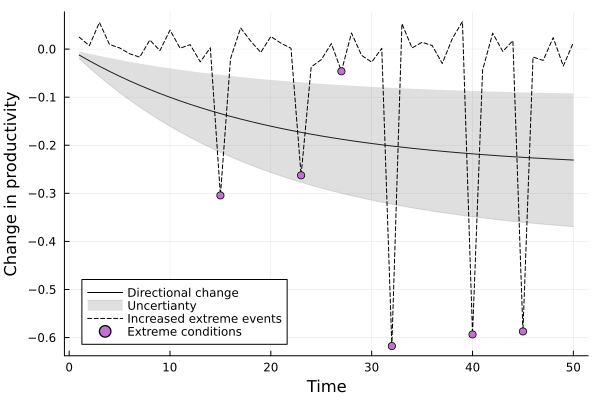

In [115]:

Random.seed!(3)
de = Distributions.Normal(-0.4,0.2)
d = Distributions.Normal(0,0.025)
T = 50
x = 1:T
rho = 0.95
rt_low = -0.4*(1 .-rho.^x)
rt = -0.25*(1 .-rho.^x)
rt_high = -0.10*(1 .-rho.^x)

Plots.plot(rt, color = "black", label = "Directional change")
Plots.plot!(rt_low,fillrange = rt_high, alpha = 0.25, color = "grey",
label = "Uncertianty")

events = (rand(T) .< 0.1)
rt = rand(d,T) .+  events.* rand(de,T)
Plots.plot!(1:T,rt, color = "black", label = "Increased extreme events", linestyle = :dash)
Plots.scatter!(collect(1:T)[events],rt[events],
legend =:bottomleft, 
label = "Extreme conditions",
ylabel = "Change in productivity",
xlabel = "Time")